# Module 9: K-Means Clustering

#       Assignment-1

#       Assignment-2

# Problem Statement:
    
You work in XYZ Company as a Python developer. The company officials want
you to write code for a clustering problem.

Dataset: customers.csv
    
Tasks To Be Performed:

1. K-Means Clustering:
● Load customer data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Load customer data
data = pd.read_csv("customers.csv")

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
data.shape

(200, 5)

● Check the number of cells in each column with null values

In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

no null values found in dataset

● Create a scatter plot with Age as X and Spending Score as Y


In [ ]:
X = data['Age']
Y = data['Spending Score (1-100)']

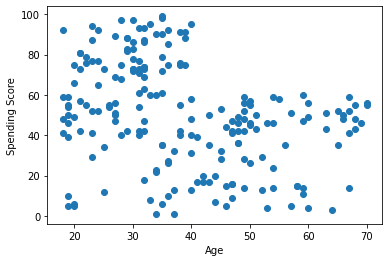

In [ ]:
plt.scatter(X,Y)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

● Draw a scatter plot displaying data points colored on the basis of clusters

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender']) ##  Convert categorical variable into integers using label encoder

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data1 = scaler.fit_transform(data) ## NORMALIZE THE DATA THROUGH MIN MAX SCALER

In [ ]:
cols = data.columns

In [ ]:
data2=pd.DataFrame(data1,columns=[cols])
data2                                       ##  Normalized dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.860656,0.795918
196,0.984925,0.0,0.519231,0.909836,0.275510
197,0.989950,1.0,0.269231,0.909836,0.744898
198,0.994975,1.0,0.269231,1.000000,0.173469


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(data2[['Age','Spending Score (1-100)']])
y_pred

array([2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [ ]:
data2['cluster'] = y_pred
data2.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
195,0.979899,0.0,0.326923,0.860656,0.795918,1
196,0.984925,0.0,0.519231,0.909836,0.275510,2
197,0.989950,1.0,0.269231,0.909836,0.744898,1
198,0.994975,1.0,0.269231,1.000000,0.173469,2
199,1.000000,1.0,0.230769,1.000000,0.836735,1


In [ ]:
km.cluster_centers_

array([[0.7323201 , 0.40108624],
       [0.20565611, 0.73961585],
       [0.32656023, 0.23912206]])

In [ ]:
df1 = data2[y_pred == 0]
df2 = data2[y_pred == 1]
df3 = data2[y_pred == 2]
# df4 = data2[y_pred == 3]

● Draw a scatter plot displaying data points colored on the basis of
clusters

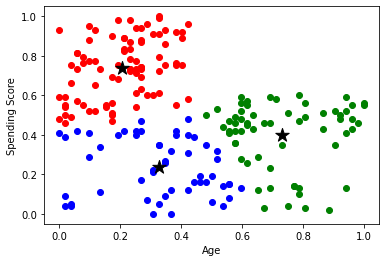

In [ ]:
plt.scatter(df1['Age'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Age'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Age'],df3['Spending Score (1-100)'],color='blue')
#plt.scatter(df4['Age'],df4['Spending Score (1-100)'],color='cyan')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 200,marker = "*", c = 'black')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

# Use Elbow method to find optimal number of clusters


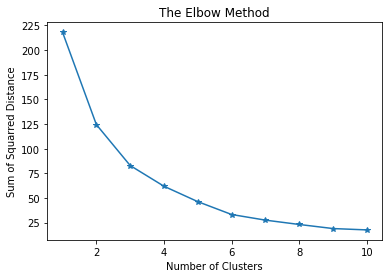

In [ ]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters = i,max_iter= 300,random_state = 42)
    km.fit_predict(data2)
    clusters.append(km.inertia_)

plt.plot(range(1,11),clusters,marker='*')

plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squarred Distance')
plt.show()

'3' is optimum number of clusters. Because the most break in the chart is at that point. This is how we will select the
 optimal n_clusters.

# Module 9: K-Means Case Study

# Problem Statement:
    
Consider yourself to be Sam who is a data scientist. He has been approached by
a retail car showroom to help them segregate the cars into different clusters.

In [ ]:
## Load the dtaset
df = pd.read_csv("cars-1 (2).csv")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.shape

(32, 12)

In [ ]:
df.isna().sum() ## check null values

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

# Tasks To Be Performed:

1. Building the K-Means clustering algorithm:
    
a. Start off by extracting the ‘mpg’, ‘disp’ & ‘hp’ columns from the ‘mtcars’
   data.frame. Store the result in ‘car_features’

In [ ]:
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [ ]:
car_features = df[['mpg','disp', 'hp']]

In [ ]:
car_features.head()

,mpg,disp,hp
0,21.0,160.0,110
1,21.0,160.0,110
2,22.8,108.0,93
3,21.4,258.0,110
4,18.7,360.0,175


In [ ]:
cols = car_features.columns
cols

Index(['mpg', 'disp', 'hp'], dtype='object')

b. Build the K-Means algorithm on top of ‘car_features’. Here, the number
   of clusters should be 3
    
c. Bind the clustering vector to ‘car_features’

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
data = scaler.fit_transform(car_features)

In [ ]:
data = pd.DataFrame(data,columns=[cols])

In [ ]:
data.head()

,mpg,disp,hp
0,0.451064,0.221751,0.204947
1,0.451064,0.221751,0.204947
2,0.527660,0.092043,0.144876
3,0.468085,0.466201,0.204947
4,0.353191,0.720629,0.434629


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters = 3)
km_pred = km.fit_predict(data)

In [ ]:
km_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1,
       1, 1, 1, 2, 2, 2, 1, 0, 1, 0])

In [ ]:
data['cluster'] = km_pred
data.tail(5)                      ## if want to see which data is belong to which cluster

,mpg,disp,hp,cluster
27,0.851064,0.059865,0.215548,2
28,0.229787,0.698179,0.749117,1
29,0.395745,0.184335,0.434629,0
30,0.195745,0.573460,1.000000,1
31,0.468085,0.124470,0.201413,0


In [ ]:
km.cluster_centers_

array([[0.44787234, 0.22170949, 0.20259128],
       [0.2       , 0.70341731, 0.55552751],
       [0.83687943, 0.03878773, 0.08303887]])

d. Extract observations belonging to individual clusters

In [ ]:
df1 = data[km_pred == 0]
df1

,mpg,disp,hp,cluster
0,0.451064,0.221751,0.204947,0
1,0.451064,0.221751,0.204947,0
2,0.527660,0.092043,0.144876,0
3,0.468085,0.466201,0.204947,0
5,0.327660,0.383886,0.187279,0
7,0.595745,0.188576,0.035336,0
8,0.527660,0.173859,0.151943,0
9,0.374468,0.240708,0.250883,0
10,0.314894,0.240708,0.250883,0
20,0.472340,0.122225,0.159011,0


In [ ]:
df2 = data[km_pred == 1]
df2

,mpg,disp,hp,cluster
4,0.353191,0.720629,0.434629,1
6,0.165957,0.720629,0.681979,1
11,0.255319,0.510601,0.452297,1
12,0.293617,0.510601,0.452297,1
13,0.204255,0.510601,0.452297,1
14,0.000000,1.000000,0.540636,1
15,0.000000,0.970067,0.575972,1
16,0.182979,0.920180,0.628975,1
21,0.217021,0.615864,0.346290,1
22,0.204255,0.580943,0.346290,1


In [ ]:
df3 = data[km_pred == 2]
df3

,mpg,disp,hp,cluster
17,0.936170,0.018957,0.049470,2
18,0.851064,0.011474,0.000000,2
19,1.000000,0.000000,0.045936,2
25,0.719149,0.019706,0.049470,2
26,0.663830,0.122724,0.137809,2
27,0.851064,0.059865,0.215548,2


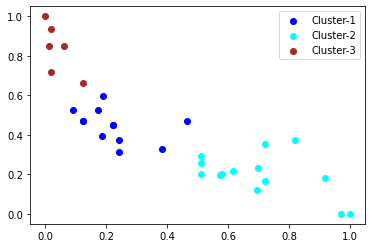

In [ ]:
plt.scatter(df1['disp'],df1['mpg'],c='blue',label = 'Cluster-1')
plt.scatter(df2['disp'],df2['mpg'],c='cyan',label = 'Cluster-2')
plt.scatter(df3['disp'],df3['mpg'],c='brown',label = 'Cluster-3')
plt.legend()
plt.show()



2. On the same ‘car_features’dataset build a K-Means algorithm, where the
   number of clusters is 5
    
    a. Bind the clustering vector to ‘car_features’

In [ ]:
car_features = df[['mpg','disp', 'hp']]

In [ ]:
data1 = pd.DataFrame(data,columns=[cols])

In [ ]:
data1.head()    # after applying MinMax Scaler to normalize dataset

,mpg,disp,hp
0,0.451064,0.221751,0.204947
1,0.451064,0.221751,0.204947
2,0.527660,0.092043,0.144876
3,0.468085,0.466201,0.204947
4,0.353191,0.720629,0.434629


In [ ]:
km1 = KMeans(n_clusters = 5)
km1_pred = km1.fit_predict(data1)

In [ ]:
km1_pred

array([3, 3, 3, 3, 1, 3, 4, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2, 0, 0, 0, 3, 1,
       1, 4, 1, 0, 0, 0, 4, 3, 4, 3])

In [ ]:
km1.cluster_centers_

array([[0.83687943, 0.03878773, 0.08303887],
       [0.27173252, 0.60994904, 0.41696113],
       [0.06099291, 0.96341565, 0.58186101],
       [0.44787234, 0.22170949, 0.20259128],
       [0.1787234 , 0.67198803, 0.77826855]])

In [ ]:
data1['CLUSTERS'] = km1_pred

In [ ]:
data1.head()

,mpg,disp,hp,CLUSTERS
0,0.451064,0.221751,0.204947,3
1,0.451064,0.221751,0.204947,3
2,0.527660,0.092043,0.144876,3
3,0.468085,0.466201,0.204947,3
4,0.353191,0.720629,0.434629,1


b. Extract observations belonging to individual clusters

In [ ]:
cluster1 = data1[km1_pred == 0]
cluster1

,mpg,disp,hp,CLUSTERS
17,0.936170,0.018957,0.049470,0
18,0.851064,0.011474,0.000000,0
19,1.000000,0.000000,0.045936,0
25,0.719149,0.019706,0.049470,0
26,0.663830,0.122724,0.137809,0
27,0.851064,0.059865,0.215548,0


In [ ]:
cluster2 = data1[km1_pred == 1]
cluster2

,mpg,disp,hp,CLUSTERS
4,0.353191,0.720629,0.434629,1
11,0.255319,0.510601,0.452297,1
12,0.293617,0.510601,0.452297,1
13,0.204255,0.510601,0.452297,1
21,0.217021,0.615864,0.346290,1
22,0.204255,0.580943,0.346290,1
24,0.374468,0.820404,0.434629,1


In [ ]:
cluster3 = data1[km1_pred == 2]
cluster3

,mpg,disp,hp,CLUSTERS
14,0.000000,1.000000,0.540636,2
15,0.000000,0.970067,0.575972,2
16,0.182979,0.920180,0.628975,2


In [ ]:
cluster4 = data1[km1_pred == 3]
cluster4

,mpg,disp,hp,CLUSTERS
0,0.451064,0.221751,0.204947,3
1,0.451064,0.221751,0.204947,3
2,0.527660,0.092043,0.144876,3
3,0.468085,0.466201,0.204947,3
5,0.327660,0.383886,0.187279,3
7,0.595745,0.188576,0.035336,3
8,0.527660,0.173859,0.151943,3
9,0.374468,0.240708,0.250883,3
10,0.314894,0.240708,0.250883,3
20,0.472340,0.122225,0.159011,3


In [ ]:
cluster5 = data1[km1_pred == 4]
cluster5

,mpg,disp,hp,CLUSTERS
6,0.165957,0.720629,0.681979,4
23,0.123404,0.695685,0.681979,4
28,0.229787,0.698179,0.749117,4
30,0.195745,0.573460,1.000000,4


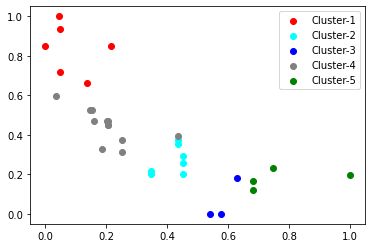

In [ ]:
plt.scatter(cluster1['hp'],cluster1['mpg'],c='red',label = 'Cluster-1')
plt.scatter(cluster2['hp'],cluster2['mpg'],c='cyan',label = 'Cluster-2')
plt.scatter(cluster3['hp'],cluster3['mpg'],c='blue',label = 'Cluster-3')
plt.scatter(cluster4['hp'],cluster4['mpg'],c='grey',label = 'Cluster-4')
plt.scatter(cluster5['hp'],cluster5['mpg'],c='green',label = 'Cluster-5')
plt.legend()
plt.show()

# Module 9: Agglomerative Clustering Assignment


# Problem Statement:
    
You work in XYZ Company as a Python Developer. The company officials want
you to write code for an Agglomerative Clustering Problem.


# Tasks To Be Performed:
    
1. Load iris data from load_iris function from sklearn.datasets package

2. From the dataset extract the data property



In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['class'] = iris.target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
73,6.1,2.8,4.7,1.2,1
30,4.8,3.1,1.6,0.2,0
98,5.1,2.5,3.0,1.1,1
29,4.7,3.2,1.6,0.2,0
134,6.1,2.6,5.6,1.4,2


3. Train an Agglomerative Clustering model based on the data

4. Plot dendrogram to visualize the clustering linkage

In [ ]:
x = iris.data

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model = AgglomerativeClustering()
model.fit(x)

AgglomerativeClustering()

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram

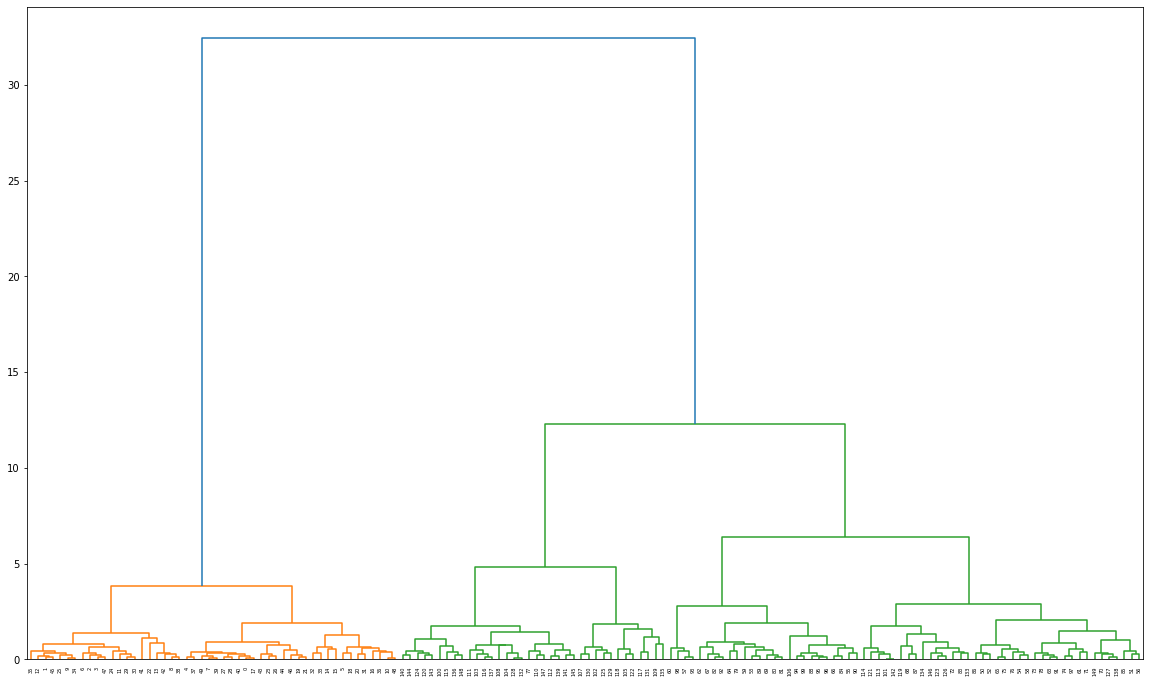

In [ ]:
plt.figure(figsize = (20,12))
z = linkage(x,'ward')
dendrogram(z,truncate_mode = 'level')
plt.show()

# Module 9: Dendrogram Assignment


# Problem Statement:
    
You work in XYZ Company as a Python developer. The company officials want
you to write code for an Agglomerative Clustering Problem.

Data:
[[5,3],
[10,15],
[15,12],
[24,10],
[30,30],
[85,70],
[71,80],
[60,78],
[70,55],
[80,91]]

# Tasks To Be Performed:
    
1. Using the np.array function create an np array from the data given above

2. Generate a scatter plot for the data

3. Plot dendrogram to visualize the clustering linkage

In [ ]:
Data = [[5,3],
[10,15],
[15,12],
[24,10],
[30,30],
[85,70],
[71,80],
[60,78],
[70,55],
[80,91],]

In [ ]:
df = np.array(Data)
df

array([[ 5,  3],
       [10, 15],
       [15, 12],
       [24, 10],
       [30, 30],
       [85, 70],
       [71, 80],
       [60, 78],
       [70, 55],
       [80, 91]])

In [ ]:
x= df[:,0]
x

array([ 5, 10, 15, 24, 30, 85, 71, 60, 70, 80])

In [ ]:
y = df[:,1]
y

array([ 3, 15, 12, 10, 30, 70, 80, 78, 55, 91])

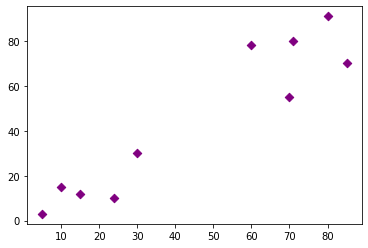

In [ ]:
plt.scatter(x,y,color='purple',marker='D')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram

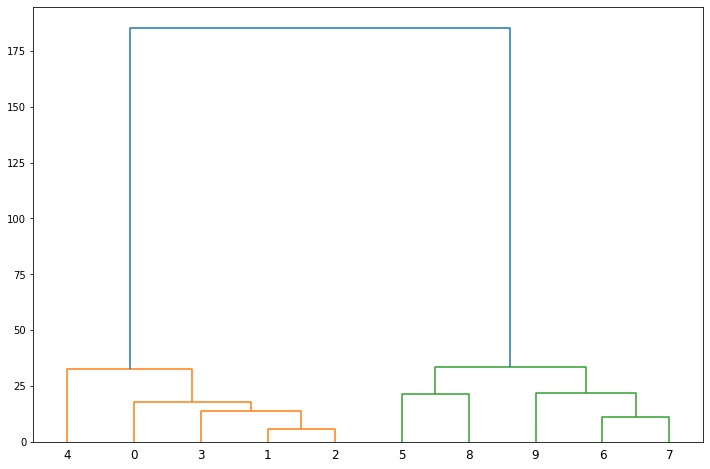

In [ ]:
plt.figure(figsize = (12,8))
z = linkage(Data,'ward')
dendrogram(z,truncate_mode = 'level')
plt.show()

# Module 9: Recommender System Case Study


# Problem Statement:
    
Sam’s next exam would be to build a “Recommender System” using the Singular
Value Decomposition (SVD) algorithm. Questions would be asked on the basis of
what you’ve learnt in the respective module.


# Tasks To Be Performed:
    
1. Implementing User-Based Recommender System using SVD (Singular
Value Decomposition) method:
    
a. Load the ‘ratings’ and ‘movies’ datasets which is a part of ‘MovieLense’


In [ ]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings.tail()

,userId,movieId,rating,timestamp
1048570,7120,168,5.0,1175543061
1048571,7120,253,4.0,1175542225
1048572,7120,260,5.0,1175542035
1048573,7120,261,4.0,1175543376
1048574,7120,266,3.5,1175542454


In [ ]:
print(movies.shape)
print(ratings.shape)

(27278, 3)
(1048575, 4)


b. Find the unique number of users and movies in the ‘ratings’ dataset


In [ ]:
n_users= ratings['userId'].nunique()
n_movies= ratings['movieId'].nunique()

In [ ]:
print('Number of unique Users = ', n_users )
print('Number of unique Movies = ',n_movies)

Number of unique Users =  7120
Number of unique Movies =  14026


c. Create a rating matrix for the ‘ratings’ dataset and store it in ‘Ratings’


In [ ]:
Ratings = ratings.pivot(index ='userId',columns='movieId',values = 'rating').fillna(0)

In [ ]:
Ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,129350,129354,129428,129707,130052,130073,130219,130462,130490,130642
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


d. Load the ‘ratings’ dataset as SVD’s Dataset object and compute 3-fold
  cross-validation using the SVD object

In [ ]:
conda install -c conda-forge scikit-surprise

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\shaneela\Anaconda3

  added / updated specs:
    - scikit-surprise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.0 MB

The following packages will be UPDATED:

  conda                               4.12.0-py39hcbf5309_0 --> 4.14.0-py39hcbf5309_0




conda-4.14.0         | 1.0 MB    |            |   0% 
conda-4.14.0         | 1.0 MB    | 1          |   2% 
conda-4.14.0         | 1.0 MB    | #2         |  12% 
conda-4.14.0         | 1.0 MB    | ##4        |  25% 
conda-4.14.0         | 1.0 MB    | ###3       |  34% 
conda-4.14.0         | 1.0 MB    | ####2      |  43% 
conda-4.14.0         | 1.0 MB

In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader()     # Load Reader library

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)  # Load ratings dataset with Dataset library

svd = SVD()        # Use the SVD algorithm.

cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)    # Compute the RMSE of the SVD algorithm.

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8453  0.8467  0.8446  0.8455  0.0009  
MAE (testset)     0.6478  0.6484  0.6469  0.6477  0.0006  
Fit time          94.00   92.04   91.09   92.38   1.21    
Test time         6.94    6.82    6.54    6.77    0.17    


{'test_rmse': array([0.84531048, 0.84674282, 0.84457241]),
 'test_mae': array([0.64782675, 0.64838799, 0.64688552]),
 'fit_time': (94.00470113754272, 92.04145359992981, 91.09467387199402),
 'test_time': (6.940535545349121, 6.82287859916687, 6.5440757274627686)}

e. Find all the movies rated as 5 stars by user id ‘5’ and store it in
‘ratings_1’ data frame

In [ ]:
ratings_1 = ratings[(ratings['userId'] == 5) & (ratings['rating'] == 5)]
ratings_1 = ratings_1.set_index('movieId')
ratings_1 = ratings_1.join(movies)['title']
ratings_1

movieId
11                     Dracula: Dead and Loving It (1995)
62      Don't Be a Menace to South Central While Drink...
141                                          Gospa (1995)
150                                 Addiction, The (1995)
260                              Ladybird Ladybird (1994)
318     Strawberry and Chocolate (Fresa y chocolate) (...
364                                       Maverick (1994)
368                                  Reality Bites (1994)
377                       When a Man Loves a Woman (1994)
380                                    Bad Company (1995)
440                    Even Cowgirls Get the Blues (1993)
454                   Geronimo: An American Legend (1993)
457                                        Go Fish (1994)
500                                      No Escape (1994)
508                            Puppet Masters, The (1994)
531                                     Short Cuts (1993)
588                Snow White and the Seven Dwarfs (1937)
589   

f. Create a shallow copy of the ‘movies’ dataset and store the result in
‘user_5’

In [ ]:
user_5 = movies.copy()      # Create a shallow copy for the movies dataset
user_5

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


g. Train a recommender system using the SVD object and predict the
ratings for user id ‘5’

In [ ]:
user_5 = movies.copy()

#Reset the index for user_5 dataset
user_5 = user_5.reset_index()

# getting full dataset
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user5
user_5['Estimate_Score'] = user_5['movieId'].apply(lambda x: svd.predict(5, x).est)

#Drop extra columns from the user5 data frame
user_5 = user_5.drop(['movieId','index'], axis = 1)

# Sort predicted ratings for user5 in descending order
user_5 = user_5.sort_values('Estimate_Score', ascending=False)
user_5

,title,genres,Estimate_Score
1173,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,5.000000
523,Schindler's List (1993),Drama|War,5.000000
2486,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5.000000
1242,Back to the Future (1985),Adventure|Comedy|Sci-Fi,5.000000
315,"Shawshank Redemption, The (1994)",Crime|Drama,5.000000
...,...,...,...
4679,Glitter (2001),Drama|Musical|Romance,2.124124
9758,Son of the Mask (2005),Adventure|Children|Comedy|Fantasy,2.098284
4147,Pokémon 3: The Movie (2001),Animation|Children,1.996552
6477,Gigli (2003),Comedy|Crime|Romance,1.947570



h. Print the top10 movie recommendations for the user id ‘5

In [ ]:
user_5.head(10)    #Print top 10 recommendations

,title,genres,Estimate_Score
5853,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,5.000000
1172,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,5.000000
3487,Gladiator (2000),Action|Adventure|Drama,5.000000
18990,Black Mirror (2011),Drama|Sci-Fi,5.000000
1173,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,5.000000
148,Apollo 13 (1995),Adventure|Drama|IMAX,4.995616
453,"Fugitive, The (1993)",Thriller,4.974606
6271,Finding Nemo (2003),Adventure|Animation|Children|Comedy,4.954023
4897,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,4.952558
2486,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.949665


Thank You